<a href="https://colab.research.google.com/github/s20033/MIW_projects/blob/main/UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing necessary libraries
from keras import layers
from keras import models
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras


In [3]:
# create a model
def create_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(8, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(4, (3, 3), padding='same', activation='relu'))
    model.add(layers.UpSampling2D((2,2)))
    model.add(layers.Conv2DTranspose(8, (3, 3), padding='same', activation='relu'))
    model.add(layers.UpSampling2D((2,2)))
    model.add(layers.Conv2DTranspose(16, (3, 3), padding='same', activation='relu'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy')
    model.summary()
    return model

In [4]:
# Data preparation
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255


11501568/11490434 [==============================] - 0s 0us/step


In [5]:
# compile and save model
model = create_model(input_shape=(28, 28, 1))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(train_images, train_images, epochs = 1, batch_size=64)
model.save_weights('weight.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 4)           292       
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 4)        0

In [6]:
model1 = create_model(input_shape=(28, 28, 1))
model1.load_weights('weight.h5')
model1.pop()
model1.pop()
model1.pop()
model1.pop()
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 4)           292       
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 14, 4)       

In [7]:
result_1 = model1.predict(train_images[:])

print(result_1.shape)
print('Result = {}'.format(result_1.shape))
a,b,c,d = result_1.shape
code = result_1.reshape(a, b*c*d)
print('code = {}'.format(code.shape))
#print(code)

(60000, 7, 7, 4)
Result = (60000, 7, 7, 4)
code = (60000, 196)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


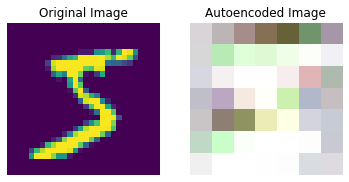

In [8]:
fig = plt.figure(figsize=(6,6))

fig.add_subplot(1,2,1)
plt.title("Original Image")
plt.imshow(train_images[0].reshape(28,28))
plt.axis("off")


fig.add_subplot(1,2,2)
plt.title("Autoencoded Image")
plt.imshow(result_1[0])
plt.axis("off")

plt.show()

#KNN classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
import time
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


def KNN(label,x_train,y_train,x_test,y_test):
    
    trainStart = time.time()
    
    clf = KNeighborsClassifier()
    
    clf.fit(x_train,y_train)
    
    y_pred = clf.predict(x_test)
    
    trainEnd = time.time()
    
    trainTook = round(trainEnd-trainStart,2)
    
    
    testStart = time.time()
    
    print("Accuracy of {} KNN is {}".format(label,accuracy_score(y_pred=y_pred,y_true=y_test)))
    
    confmatrix = confusion_matrix(y_pred=y_pred,y_true=y_test)
    
    plt.subplots(figsize=(6,6))
    sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
    plt.show()
    
    testEnd = time.time()
    
    testTook = round(testEnd-testStart,2)
    
    print("Training {} KNN took {} seconds".format(label,trainTook))
    print("Testing {} KNN took {} seconds".format(label,testTook))
    

In [25]:
result_2 = model1.predict(test_images[:,])
a,b,c,d = result_2.shape
code_2 = result_2.reshape(a, b*c*d)
print(a,b,c,d)

10000 7 7 4


In [16]:
print(code_2.shape)
print(code.shape)
test_images.shape

(10000, 196)
(60000, 196)


(10000, 28, 28, 1)

In [26]:
x_train= train_images[:]
x_train = x_train.reshape(60000,784)
x_test = test_images[:]
x_test= x_test.reshape(10000, 784)

Accuracy of KNN Classifier KNN is %0.9624


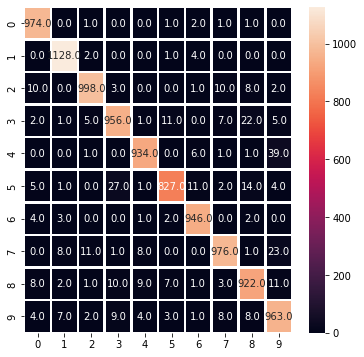

Training KNN Classifier KNN took 20.5 seconds
Testing KNN Classifier KNN took 0.66 seconds


In [31]:
KNN("KNN Classifier",code,train_labels,code_2,test_labels)